# Retail Data Analytics
<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#f7e1cd;
           letter-spacing:0.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">This notebook deals the retail sales - time series data. I am using <a style = "color:#0b70db;" href = "https://www.kaggle.com/manjeetsingh/retaildataset"> Retail sales data</a> to play around with.</h3>
<h2><b>Context</b></h2>
<h3 style = "line-height:1.3;">The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.</h3>
<h2><b>Content</b></h2>
<h3 style = "line-height:1.3;">You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.</h3>
</div>

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)

# Loading the data:

In [2]:
# Loading the data into pandas dataframe for EDA
df_stores = pd.read_csv('../input/retaildataset/stores data-set.csv')
df_features = pd.read_csv('../input/retaildataset/Features data set.csv')
df_features.Date = pd.to_datetime(df_features.Date)
df_sales = pd.read_csv('../input/retaildataset/sales data-set.csv')
df_sales.Date = pd.to_datetime(df_sales.Date)

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#f7e1cd;
           letter-spacing:0.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h2 style = "line-height:1.3;"><b>sales data-set.csv:</b></h2>
    <h3>Anonymized information about the 45 stores, indicating the type and size of store</h3>
</div>

In [3]:
df_sales.head()
df_sales.info()
df_sales.describe().T

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#f7e1cd;
           letter-spacing:0.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h2 style = "line-height:1.3;"><b>stores data-set.csv:</b></h2>
    <h3 style = "line-height:1.3;">
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
<ul>
<li>Store - the store number</li>
<li>Dept - the department number</li>
<li>Date - the week</li>
<li>Weekly_Sales -  sales for the given department in the given store</li>
<li>IsHoliday - whether the week is a special holiday week</li>
        </ul>
    </h3>
</div>

In [4]:
df_stores.head()
df_stores.info()
df_stores.describe().T

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


# Merging the data into a single Dataframe:

In [5]:
df_features = df_features.merge(df_stores, on = 'Store')
df = df_features.merge(df_sales, on = ['Store','Date','IsHoliday'])

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#f7e1cd;
           letter-spacing:0.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h2 style = "line-height:1.3;"><b>Features data-set.csv :</b></h2>
    <h3 style = "line-height:1.3em">
        Contains additional data related to the store, department, and regional activity for the given dates.
<ul><li>Store - the store number</li>
<li>Date - the week</li>
<li>Temperature - average temperature in the region</li>
<li>Fuel_Price - cost of fuel in the region</li>
<li>MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA</li>
<li>CPI - the consumer price index</li>
<li>Unemployment - the unemployment rate</li>
<li>IsHoliday - whether the week is a special holiday week</li></ul></h3>
</div>

In [6]:
df.head()
df.info()
df.describe().T
df = df.sort_values(by = ['Date'])

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000


In [7]:
# splitting date into 3 columns denoting Year, Month and Day respectively
df['Year'] = df.Date.apply(lambda x: int(str(x)[:4]))
df['Month'] = df.Date.apply(lambda x: int(str(x)[5:7]))
df['Year-Month'] = df.Date.apply(lambda x: str(x)[:7])
df['Day'] = df.Date.apply(lambda x: int(str(x)[8:10]))

# Exploratory Data analysis:

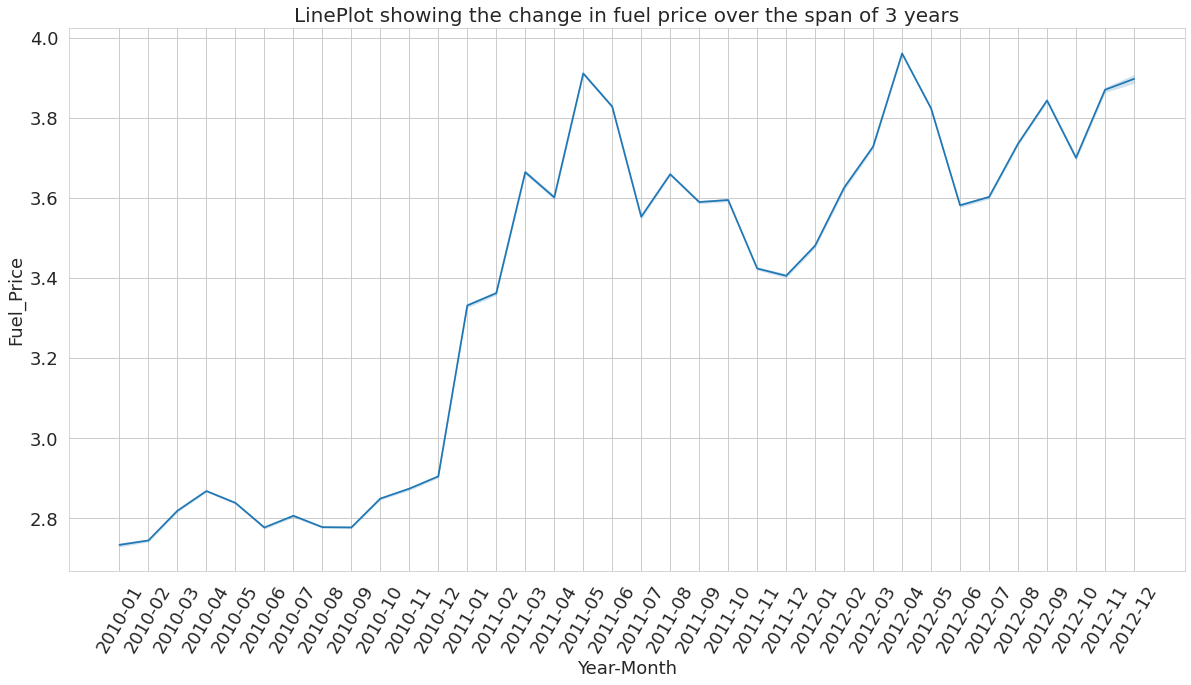

In [8]:
#df.groupby(['Year','Month']).Fuel_Price.mean()
plot_no = 1
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df, x = 'Year-Month',y = 'Fuel_Price')
_ = plt.title('LinePlot showing the change in fuel price over the span of 3 years', fontsize=20)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [9]:
r = 5 #lets round off the temperature in the range of r
df['Temperature_r'] = df.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)

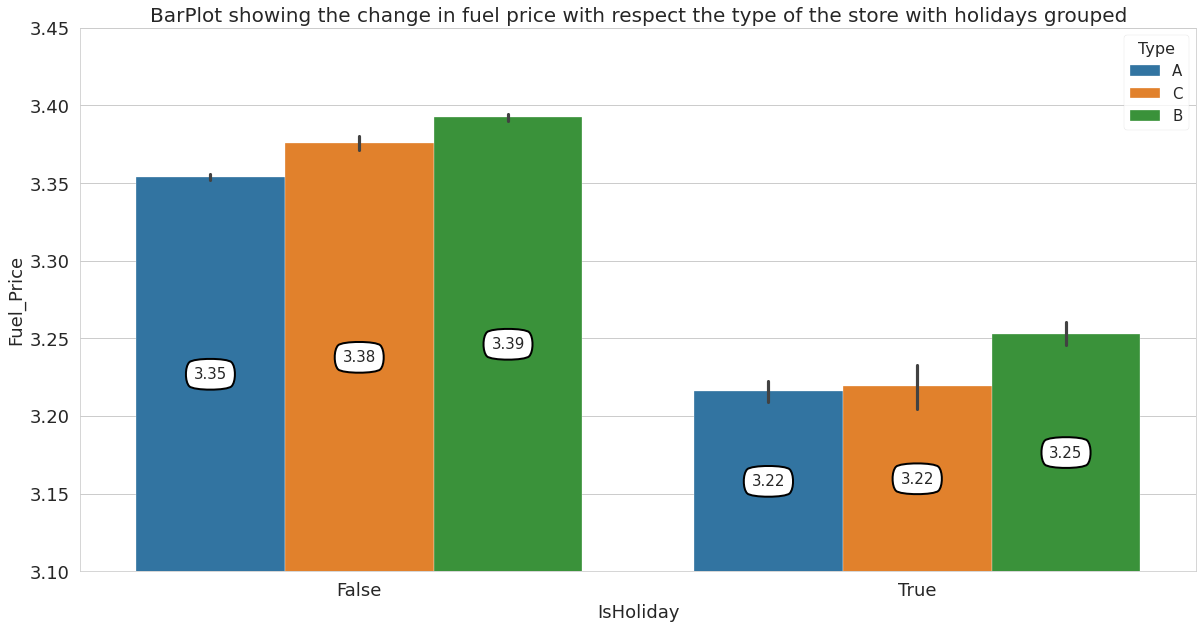

In [10]:
_ = plt.subplots(figsize = (20,10))
_ = plt.ylim(3.1,3.45)
plots = sns.barplot(data = df, x = 'IsHoliday', y = 'Fuel_Price', hue = 'Type')
_ = plt.title('BarPlot showing the change in fuel price with respect the type of the store with holidays grouped')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

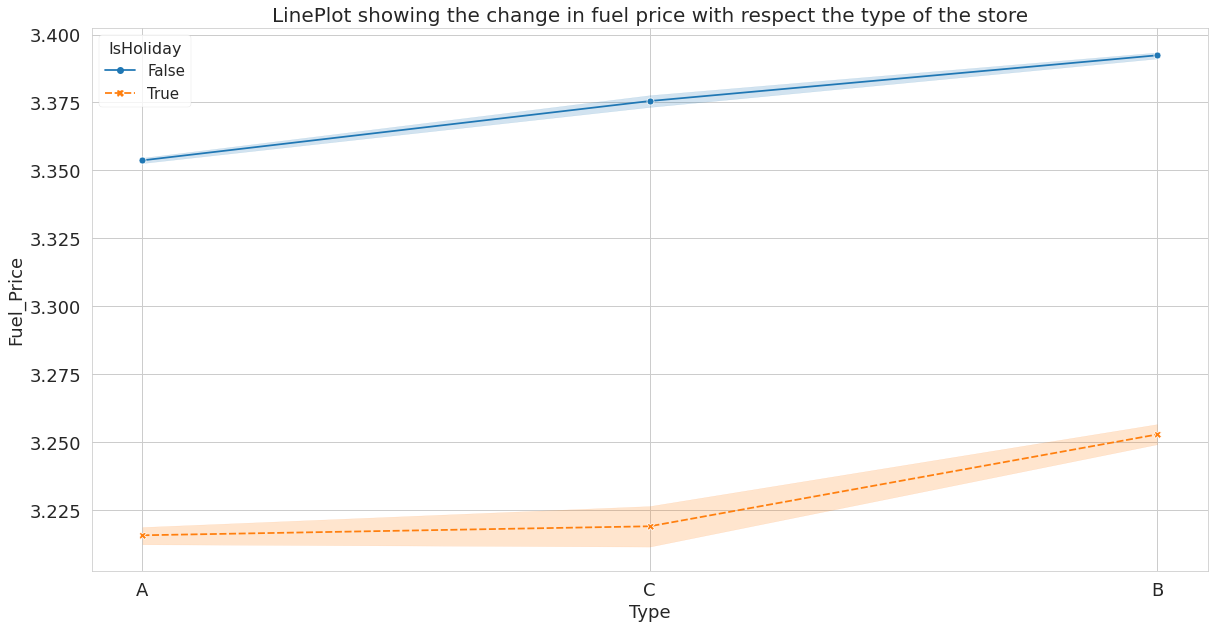

In [11]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Type', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.title('LinePlot showing the change in fuel price with respect the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">There is a significant increase in the fuel price for the type B store and comparatively the fuels prices were very less during weekends. </h3>
</div>

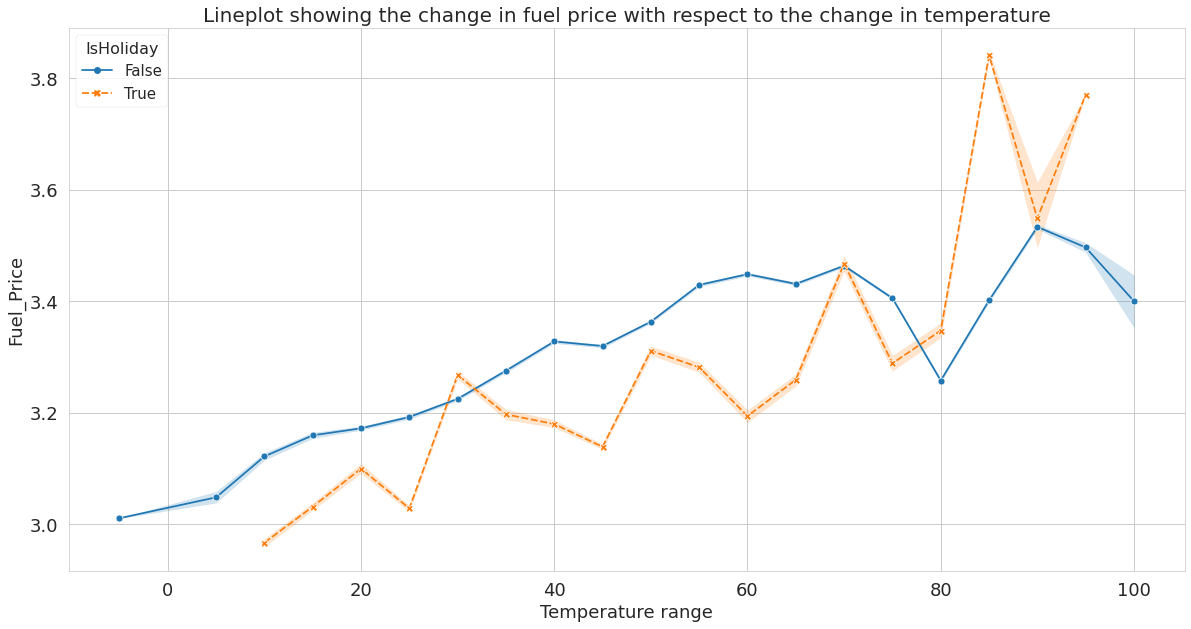

In [12]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Temperature_r', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.xlabel('Temperature range')
_ = plt.title('Lineplot showing the change in fuel price with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

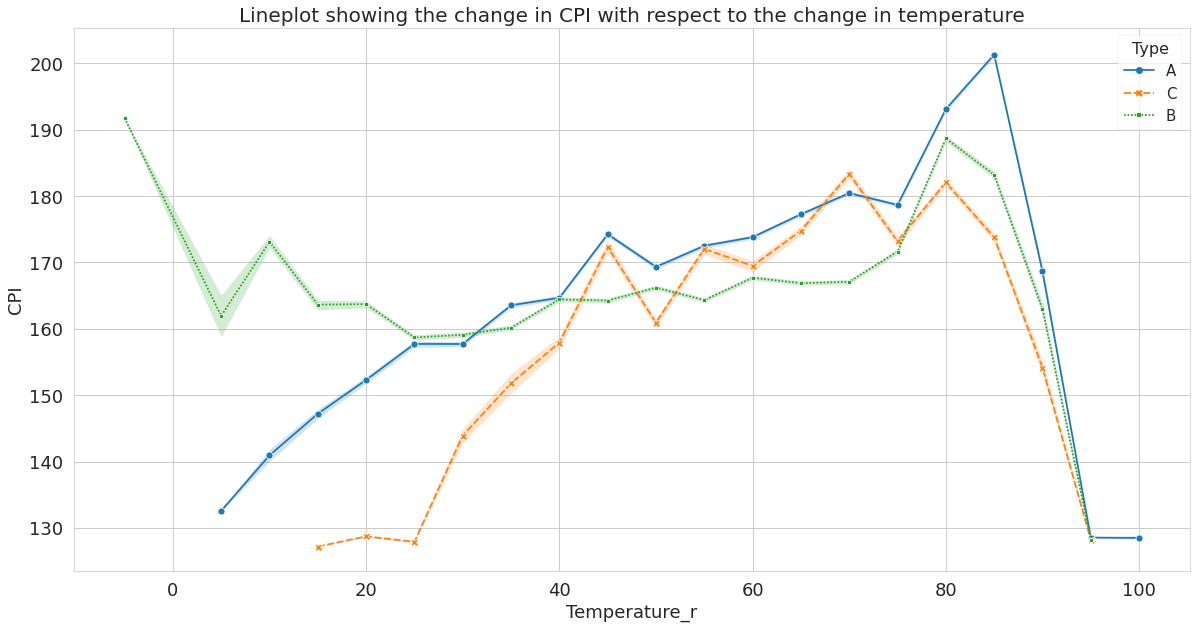

In [13]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Temperature_r', y = 'CPI', hue = 'Type',style = 'Type', markers = True, ci = 68)
_ = plt.title('Lineplot showing the change in CPI with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">It is seen that the fuel price increases with increase in temperature steadily during workdays and unevenly during holidays</h3>
</div>

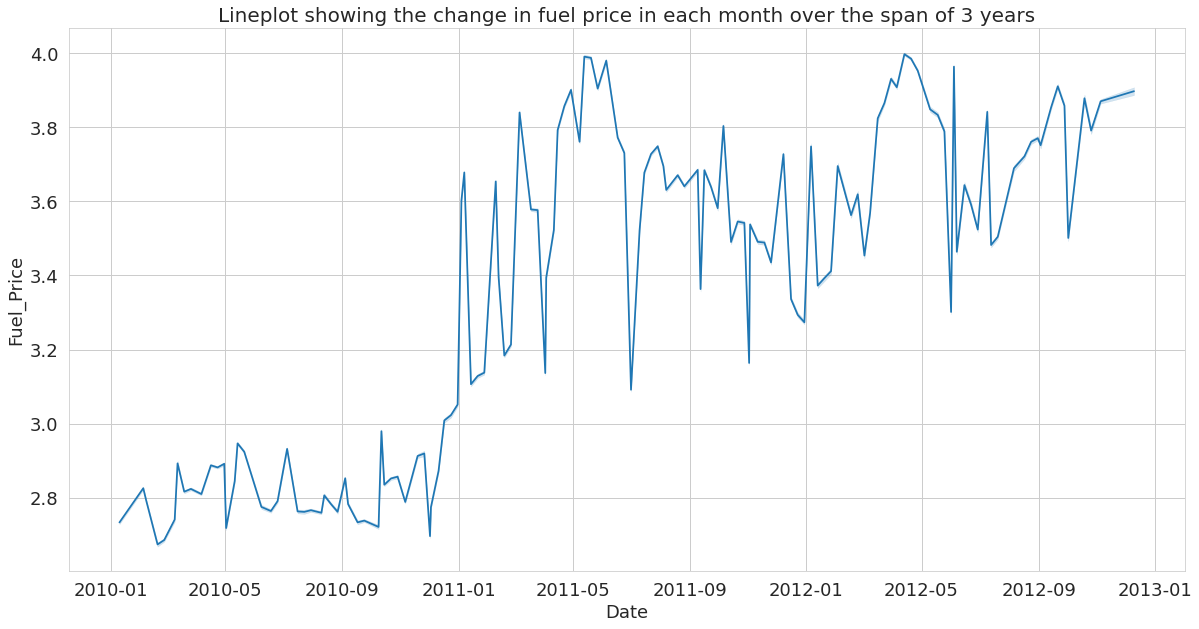

In [14]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Date', y = 'Fuel_Price')
_ = plt.title('Lineplot showing the change in fuel price in each month over the span of 3 years')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

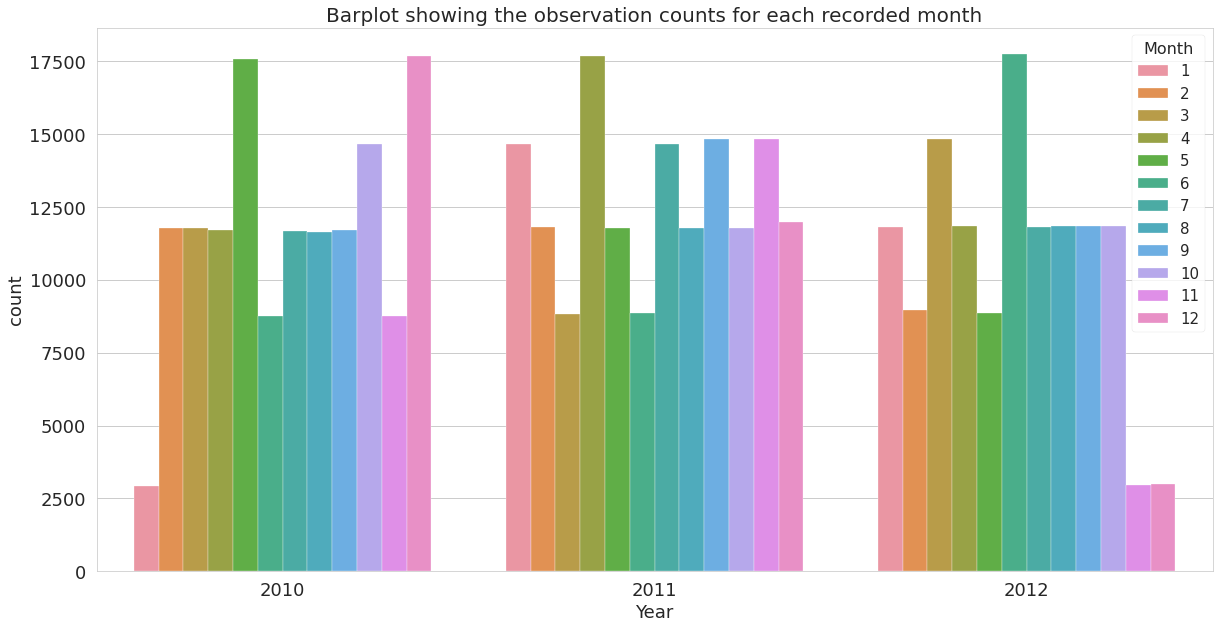

In [15]:
_ = plt.subplots(figsize = (20,10))
_ = sns.countplot(data = df,x='Year',hue='Month')
_ = plt.title('Barplot showing the observation counts for each recorded month')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">There is no significant pattern in the data points spread each months in the dataset. However one noticeable cue is that no sales data is recorded / happened during the month of September in 2013</h3>
</div>

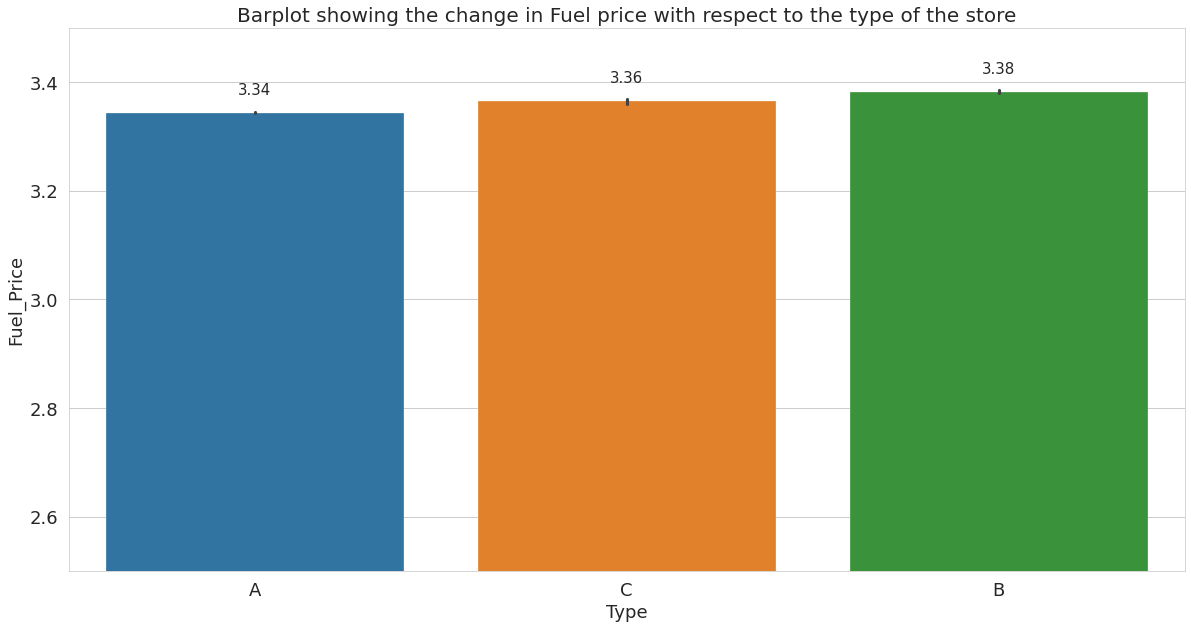

In [16]:
_ = plt.subplots(figsize = (20,10))
plots = sns.barplot(data = df, x = 'Type', y = 'Fuel_Price')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 23),
                   textcoords='offset points');
_ = plt.ylim(2.5,3.5)
_ = plt.title('Barplot showing the change in Fuel price with respect to the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [17]:
df_rolled_mean = df.set_index('Date').rolling(window = 2948).mean().reset_index()
df_rolled_std = df.set_index('Date').rolling(window = 2948).std().reset_index()

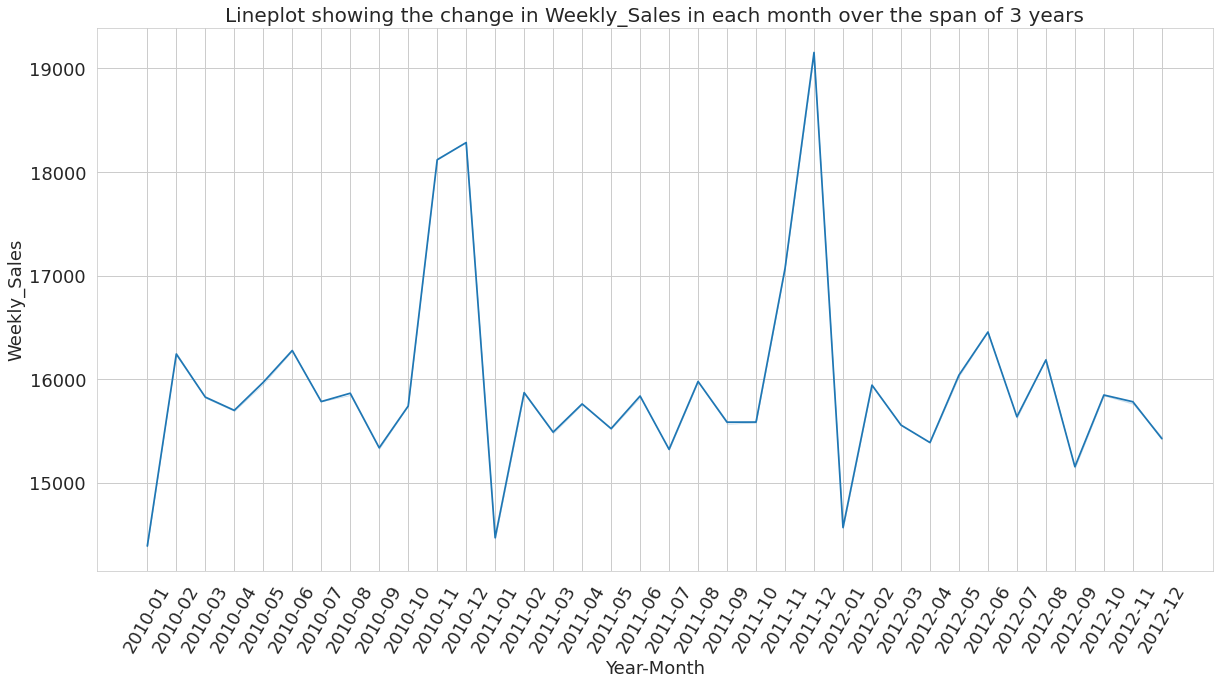

In [18]:

fig,ax = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Year-Month', y = 'Weekly_Sales', ax = ax, ci = 1)
_ = plt.xticks(rotation = 60)
_ = plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">There was a peak during the end of the years 2010 and 2011 but not during 2012. This might be due to comparatively very less observations during the last 2 months in 2012</h3>
</div>

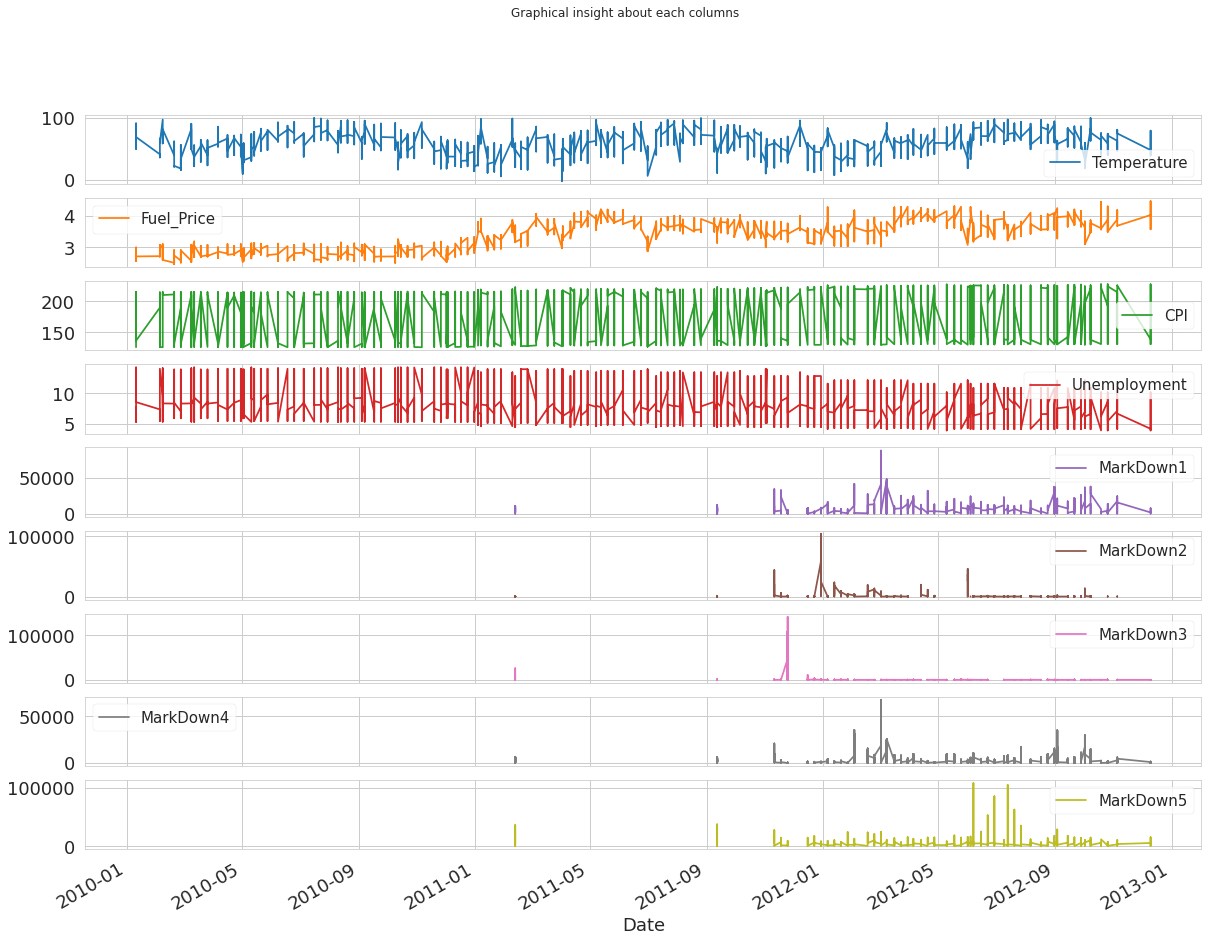

In [19]:
_ = df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x = 'Date', subplots = True, figsize = (20,15), title = 'Graphical insight about each columns')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [20]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
ts = df_average_sales_week.set_index('Date')

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



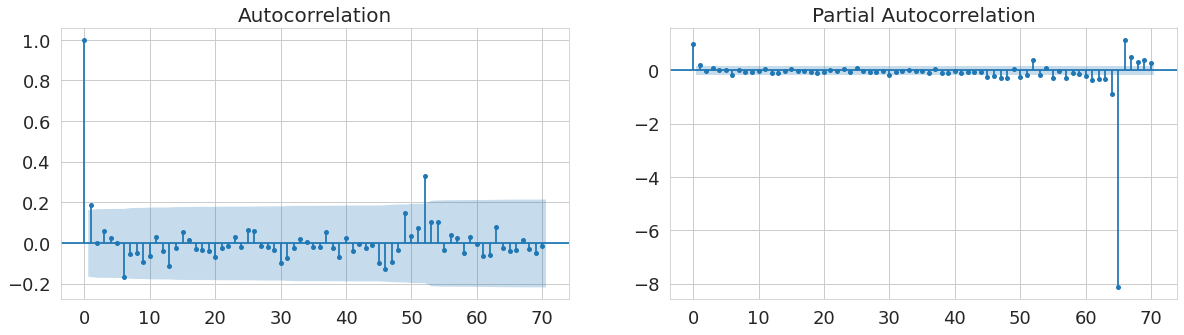

In [21]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=70, ax=axes[0])
_ = plot_pacf(ts, lags=70, ax=axes[1])